# Lab Group 1: Lab 1 Presentation January 28, 2021
### Jennifer Evans(5.1), Madeline Sandfrey(5.2), Melanie Russo(5.2), Olivia Salaben(5.3)

In [1]:
import numpy as np
import pandas as pd

import ugradio
import ugradio.pico as pico
import ugradio.dft as dft

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from ipywidgets import interact, FloatSlider, Layout

## 5.1: Sample signal
parameters:
    - Voltage Range: 1V
    - N = 1
    - Dual = True
    - Nblocks = 3

In [2]:
imported_data = np.load("data.npz")

In [3]:
sig_a_data = imported_data["arr_0"][0,0, :200]
sig_a_data[:10]

array([ -9216,  11008, -12544,  14080, -15104,  16128, -16640,  17152,
       -17152,  17152], dtype=int16)

In [4]:
sig_b_data = imported_data["arr_0"][1,0,:200]
sig_b_data[:10]

array([ 16640,   3584, -10496, -19200, -19200, -10240,   4096,  16896,
        21248,  14848], dtype=int16)

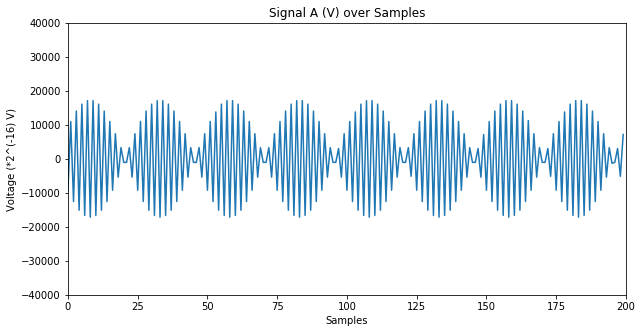

In [5]:
# signal A over samples
plt.figure(figsize=(10,5))
plt.xlim(0, 200)
plt.ylim(-40000,40000)
plt.xlabel("Samples")
plt.ylabel("Voltage (*2^(-16) V)")
plt.title("Signal A (V) over Samples")
plt.plot(sig_a_data)

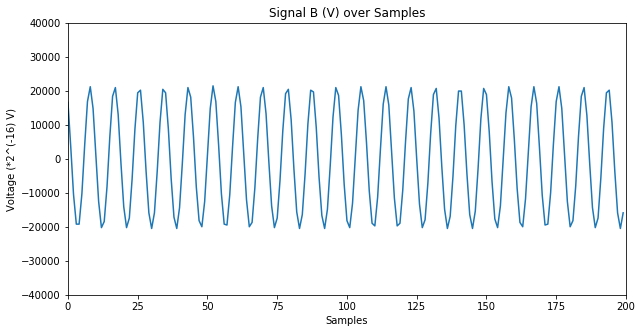

In [6]:
# signal B over samples
plt.figure(figsize=(10,5))
plt.xlim(0, 200)
plt.ylim(-40000,40000)
plt.xlabel("Samples")
plt.ylabel("Voltage (*2^(-16) V)")
plt.title("Signal B (V) over Samples")
plt.plot(sig_b_data)

## 5.1 : Create time array from sampling frequency 62.5 MHz/N

In [7]:
data_length = len(sig_a_data)
N = 1
sampling_frequency_MHz = 62500/N
delta_t = 1/sampling_frequency_MHz
total_time = delta_t * data_length  

In [8]:
times = np.arange(0, total_time, delta_t)
times[:10]

array([0.00e+00, 1.60e-05, 3.20e-05, 4.80e-05, 6.40e-05, 8.00e-05,
       9.60e-05, 1.12e-04, 1.28e-04, 1.44e-04])

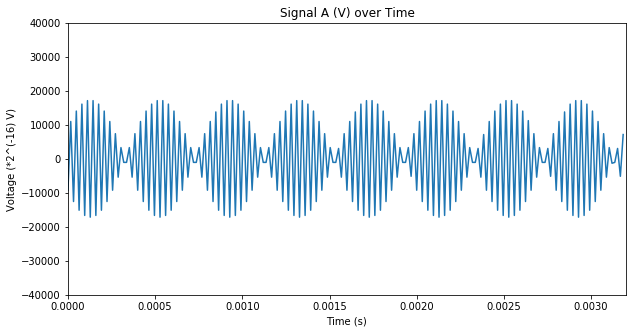

In [9]:
# signal A over time
plt.figure(figsize=(10,5))
plt.xlim(0, total_time)
plt.ylim(-40000,40000)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (*2^(-16) V)")
plt.title("Signal A (V) over Time")
plt.plot(times, sig_a_data)

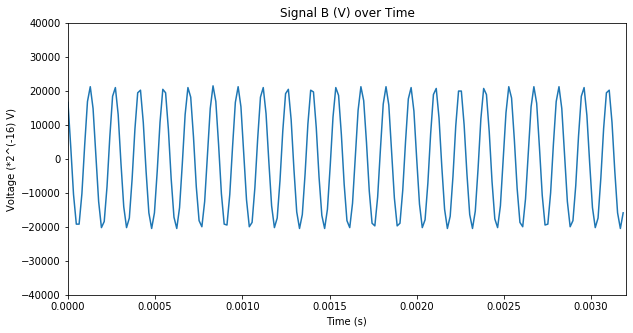

In [10]:
# signal B over time
plt.figure(figsize=(10,5))
plt.xlim(0, total_time)
plt.ylim(-40000,40000)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (*2^(-16) V)")
plt.title("Signal B (V) over Time")
plt.plot(times, sig_b_data)

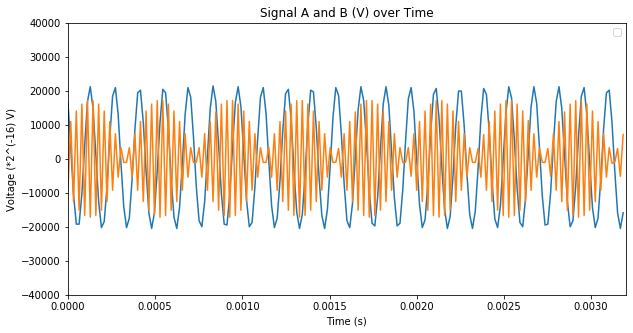

In [11]:
plt.figure(figsize=(10,5))
plt.xlim(0, total_time)
plt.ylim(-40000,40000)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (*2^(-16) V)")
plt.title("Signal A and B (V) over Time")
plt.legend(["Signal A", "Signal B"])
plt.plot(times, sig_b_data)
plt.plot(times, sig_a_data)

## 5.2 : Derive and Plot Fourier Transform

In [12]:
# dft.dft
ft_time = dft.dft(sig_a_data, vsamp=62500000)[0]
dft_sig_a = dft.dft(sig_a_data, vsamp=62500000)[1]
dft_sig_b = dft.dft(sig_b_data, vsamp=62500000)[1]

# numpy.fft.fft
fft_sig_a = np.fft.fft(sig_a_data)
fft_sig_a = np.fft.fftshift(fft_sig_a)
fft_sig_b = np.fft.fft(sig_b_data)
fft_sig_b = np.fft.fftshift(fft_sig_b)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Signal A Discrete and Fast Fourier Transform')

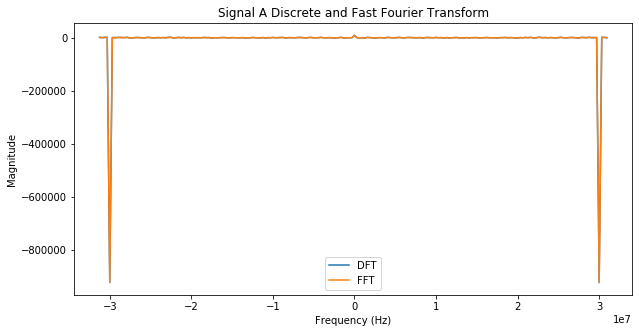

In [13]:
# dft and fft plots for Signal A
plt.figure(figsize=(10,5))
plt.plot(ft_time, dft_sig_a)
plt.plot(ft_time, fft_sig_a)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend(["DFT", "FFT"])
plt.title("Signal A Discrete and Fast Fourier Transform")

Text(0.5, 1.0, 'Signal B Discrete and Fast Fourier Transform')

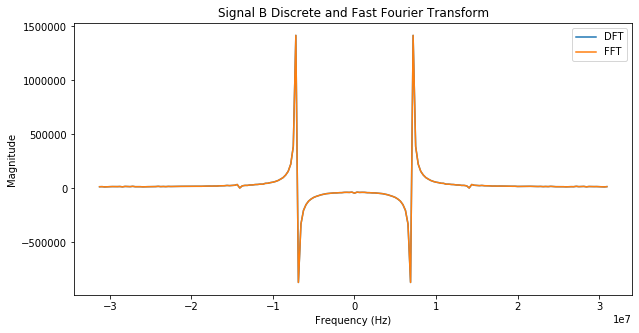

In [15]:
# dft and fft plots for Signal B
plt.figure(figsize=(10,5))
plt.plot(ft_time, dft_sig_b)
plt.plot(ft_time, fft_sig_b)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend(["DFT", "FFT"])
plt.title("Signal B Discrete and Fast Fourier Transform")

## 5.2: Derive and Plot Fourier Power Spectra

In [16]:
power_ft_sig_a = [abs(s)**2 for s in fft_sig_a]
power_ft_sig_b = [abs(s)**2 for s in fft_sig_b]

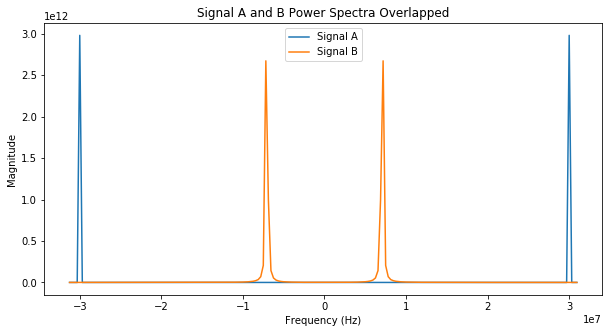

In [18]:
# dft power spectra comparison for signals a and b
plt.figure(figsize=(10,5))
plt.plot(ft_time, power_ft_sig_a)
plt.plot(ft_time, power_ft_sig_b)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Signal A and B Power Spectra Overlapped")
plt.legend(["Signal A", "Signal B"])
#plt.xlim(0, 200)
#plt.ylim(-25000,25000)

## 5.2: Find Signal A Frequencies 

In [20]:
i = power_ft_sig_a.index(max(power_ft_sig_a))
sig_a_dft_frequency = abs(ft_time[i])
print("Signal A frequency: " + str(sig_a_dft_frequency/(10**6)) + " MHz")

Signal A frequency: 30.0 MHz


## 5.2: Find Signal B Frequencies 

In [21]:
i = power_ft_sig_b.index(max(power_ft_sig_b))
sig_b_dft_frequency = abs(ft_time[i])
print("Signal B DFT frequency: " + str(sig_b_dft_frequency/(10**6)) + " MHz")

Signal B DFT frequency: 7.1875 MHz


## 5.2: Compare Signal A and Signal B Time and Frequency Domain Plots

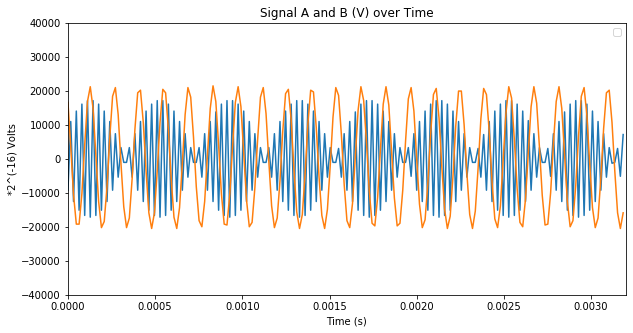

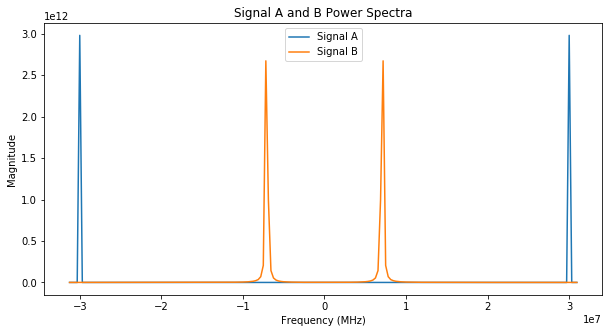

In [22]:
plt.figure(figsize=(10,5))
plt.xlim(0, total_time)
plt.ylim(-40000,40000)
plt.xlabel("Time (s)")
plt.ylabel("*2^(-16) Volts")
plt.title("Signal A and B (V) over Time")
plt.legend(["Signal A", "Signal B"])
plt.plot(times, sig_a_data)
plt.plot(times, sig_b_data)

plt.figure(figsize=(10,5))
plt.plot(ft_time, power_ft_sig_a)
plt.plot(ft_time, power_ft_sig_b)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Magnitude")
plt.title("Signal A and B Power Spectra")
plt.legend(["Signal A", "Signal B"])
#plt.xlim(0, 200)
#plt.ylim(-25000,25000)

# 5.3

In [1]:
for i in range(200, 16000, 500):
    sig_b_data_2 = imported_data["arr_0"][1,0, i:i+200]
    dft_sig_b_2 = dft.dft(sig_b_data_2, vsamp=1)[1]
    plt.figure(figsize=(10,5))
    plt.xlim(-.6, .6)
    plt.ylim(-1100000, 1500000)
    plt.plot(ft_time, dft_sig_b_2.real)
    plt.plot(ft_time, dft_sig_b_2.imag)
    plt.xlabel("Frequency (MHz)")
    plt.ylabel("Magnitude")
    plt.legend(["Real", "Imaginary"])
    plt.title("Signal B_2 Real and Imaginary Discrete Fourier Transform for Sample Range: " + str(i))

NameError: name 'imported_data' is not defined